# Logistic Regression

## Agenda

1. Refresh with linear regression using scikit-learn
2. Attempt to use linear regression for classification
3. See why logistic regression is a better alternative for classification
4. Explain the form of logistic regression
5. Explain how to interpret logistic regression coefficients
6. Demonstrate how logistic regression works with categorical features
7. Compare logistic regression with other models

## Part 1: Predicting a Continuous Response using linear regression

In [1]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values(by='al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


**Question:** Pretend that we want to predict **ri**, and our only feature is **al**. How could we do it using machine learning?

**Answer:** We could frame it as a regression problem, and use a linear regression model with **al** as the only feature and **ri** as the response.

**Question:** How would we **visualize** this model?

**Answer:** Create a scatter plot with **al** on the x-axis and **ri** on the y-axis, and draw the line of best fit.

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

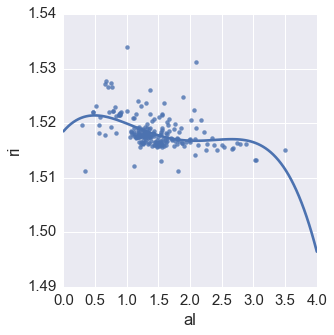

In [4]:
# using seaborn, create a scatterplot using seaborn of the al values vs the ri values
sns.lmplot(x='al', y='ri', data=glass, ci=None, order=4)

**Question:** How would we draw this plot without using Seaborn?

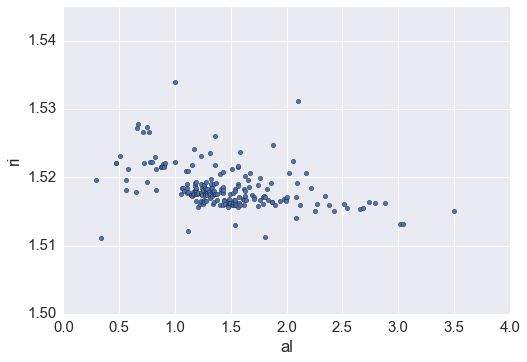

In [5]:
# create the same scatter plot of al and ri using Pandas .plot() method
glass.plot(kind='scatter', x='al', y='ri')

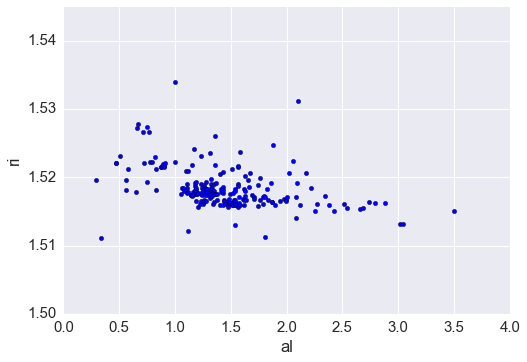

In [6]:
# equivalent scatter plot using Matplotlib directly
plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

Let's create a linear regression model.  What are our 6 steps for creating a model?

In [7]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# make predictions for all values of X and add them to the glass dataframe as a new column named "ri_pred"
glass['ri_pred'] = linreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


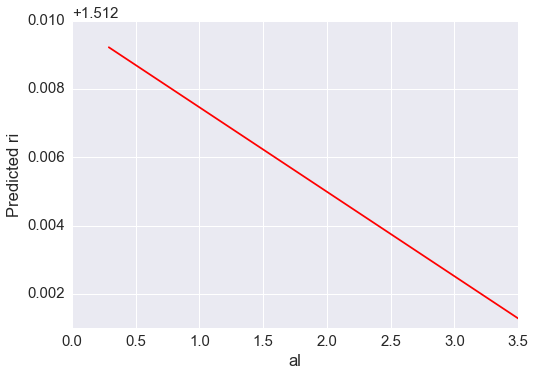

In [9]:
# plot those predictions connected by a line
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('Predicted ri')

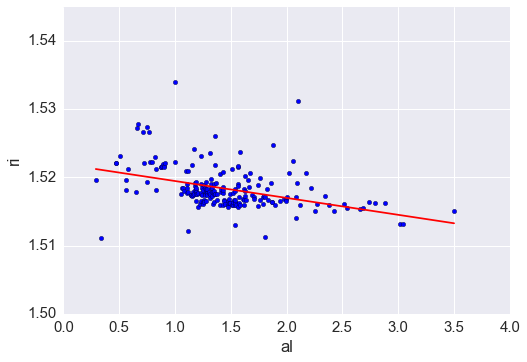

In [10]:
# put the plots together
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

### Refresher: interpreting linear regression coefficients

Linear regression equation: $y = \beta_0 + \beta_1x$

In [11]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([ 1.51699012])

In [12]:
# compute prediction for al=2 using the predict method
linreg.predict(2)

array([ 1.51699012])

In [13]:
# examine coefficient for al
zip(feature_cols, linreg.coef_)

[('al', -0.0024776063874696235)]

**Interpretation:** A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.

In [14]:
# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.0024776063874696243

1.5145125136125304

In [15]:
# compute prediction for al=3 using the predict method
linreg.predict(3)

array([ 1.51451251])

## Part 2: Predicting a Categorical Response

In [16]:
# Let's look at the column names and first row
glass.head(1)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.0,0.0,0.0,1,1.521227


In [17]:
type(glass.glass_type.value_counts())

pandas.core.series.Series

In [18]:
# examine the number of observations by glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [19]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household
id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0


Let's change our task, so that we're predicting **household** using **al**. Let's visualize the relationship to figure out how to do this:

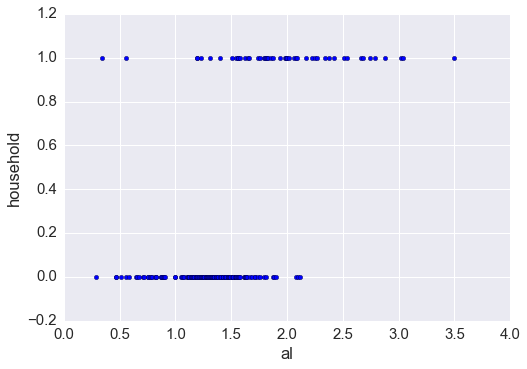

In [20]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

Let's draw a **regression line**, like we did before:

In [21]:
# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

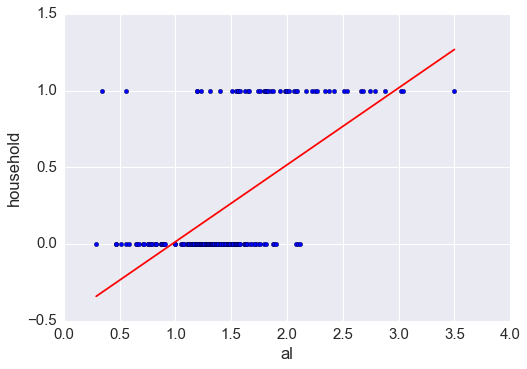

In [23]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

If **al=3**, what class do we predict for household? **1**

If **al=1.5**, what class do we predict for household? **0**

We predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

In [24]:
# understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], 
      dtype='|S5')

In [25]:
# transform household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


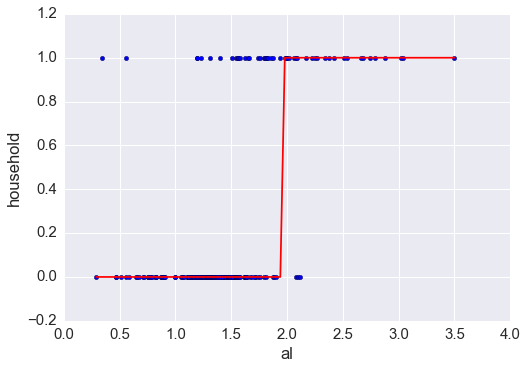

In [26]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

## Part 3: Using Logistic Regression Instead

Logistic regression can do what we just did and give us the probability of the prediction being correct

In [27]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

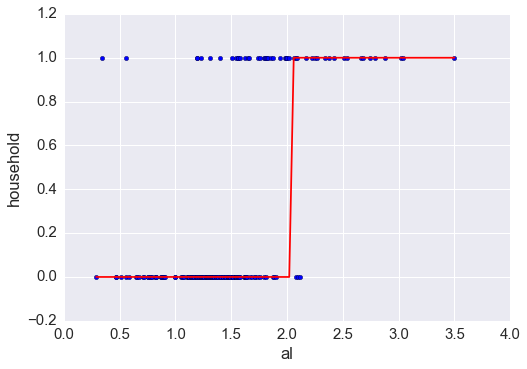

In [28]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

With logistic regression we can easily get the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction.

In [29]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class,household_pred_prob
id,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0,0.028066
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0,0.030943
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.039820
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.039820
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0,0.043012


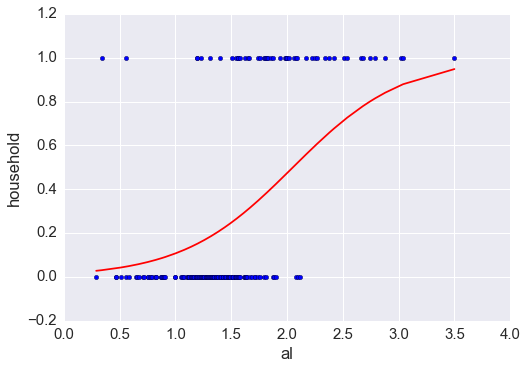

In [30]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [31]:
# examine some example predictions
print logreg.predict(1)
print logreg.predict(2)
print logreg.predict(3)

[0]
[0]
[1]


In [32]:
print logreg.predict_proba(1)
print logreg.predict_proba(2)
print logreg.predict_proba(3)

[[ 0.89253652  0.10746348]]
[[ 0.52645662  0.47354338]]
[[ 0.12953623  0.87046377]]


The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

### Logistic Regression

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** a binary response (true/false, 1/0, win/loss...) is modeled with a log function to produce a prediction and the probability the prediction is correct.


$$Probability = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$


The **logistic function** has some nice properties:
- Takes on an "s" shape
- Output is bounded by 0 and 1



## Part 4: Interpreting Logistic Regression Coefficients

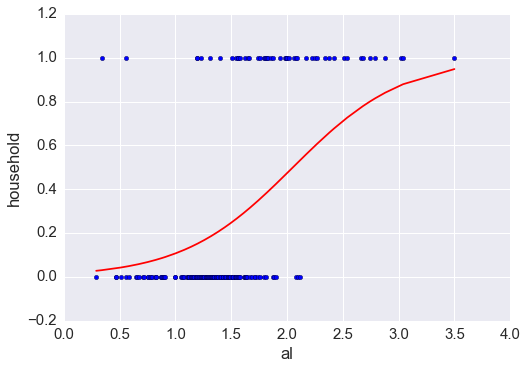

In [33]:
# plot the predicted probabilities again
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [34]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(2)

array([[ 0.52645662,  0.47354338]])

In [35]:
# examine the coefficient for al
zip(feature_cols, logreg.coef_[0])

[('al', 2.0109909641729451)]

**Interpretation:** A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'household'.


**Bottom line:** Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

![Logistic regression beta values](images/logistic_betas.png)

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

## Part 7: Using Logistic Regression with Categorical Features

Logistic regression can still be used with **categorical features with more than 2 different values**. Let's see what that looks like:

In [36]:
# create a categorical feature
glass['high_al'] = np.where(glass.al > 2, 1, 0)

Let's use Seaborn to draw the logistic curve:

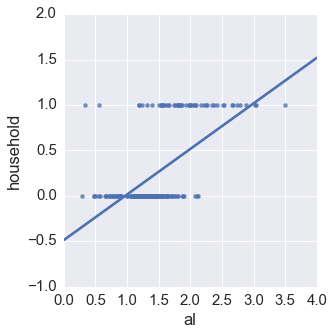

In [38]:
# original (continuous) feature
sns.lmplot(x='al', y='household', data=glass, ci=None)

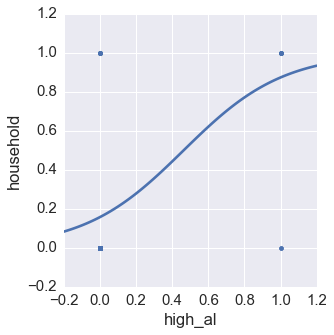

In [39]:
# categorical feature
sns.lmplot(x='high_al', y='household', data=glass, ci=None, logistic=True)

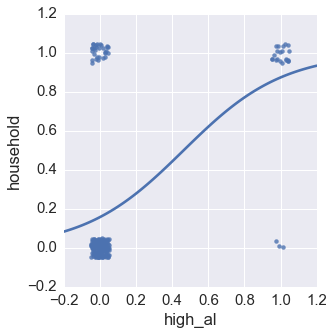

In [40]:
# categorical feature, with jitter added
sns.lmplot(x='high_al', y='household', data=glass, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.05)

In [41]:
# fit a logistic regression model
feature_cols = ['high_al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
logreg.predict(.2)

array([0], dtype=int64)

In [43]:
logreg.predict(.8)

array([1], dtype=int64)

## Part 8: Comparing Logistic Regression with Other Models

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Works only on datasets with binary responses unless extended by breaking larger numbers of responses into multiple binary problems or Multinomial logistic regression is used
- Performance is (generally) not competitive with the best supervised learning methods
- Can't automatically learn feature interactions